## Neural Network implementation from scratch

Neural Network is a computer system modelled on human brain and nervous system.<br>
It consists of input , hidden and output layers. These networks are used incresingly today because of their 
vast potential and ability to solve complex problems accurately. <br><br>

<br>
This code is an easy implementation of the Neural Network , to give a basic idea about how these networks work.

In [1]:
# import the required libraries

import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# each point indicates a flower with specific length, width and type(0,1)

data = [[3,1.5,1],
        [2,1,0],
        [4,1.5,1],
        [3,1,0],
        [3.5,0.5,1],
        [2,0.5,0],
        [5.5,1,1],
        [1,1,0]]
mystery_flower = [4.5,1]

In [38]:
# network initialization (w1,w2,b) length, width, flower type 

w1 = np.random.randn() # for length
w2 = np.random.randn() # for width
b = np.random.randn()

In [39]:
# activation function (in this case sigmoid function) and its derivative

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

T =  [-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ] 

Y =  [0.00669285 0.01127661 0.0189398  0.03164396 0.05241435 0.08561266
 0.1368025  0.21151967 0.31228169 0.43458759 0.56541241 0.68771831
 0.78848033 0.8631975  0.91438734 0.94758565 0.96835604 0.9810602
 0.98872339 0.99330715] 

Z =  [0.00664806 0.01114945 0.01858108 0.03064262 0.04966709 0.07828314
 0.11808757 0.1667791  0.21476184 0.24572122 0.24572122 0.21476184
 0.1667791  0.11808757 0.07828314 0.04966709 0.03064262 0.01858108
 0.01114945 0.00664806] 



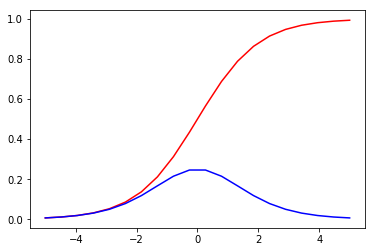

In [40]:
# plot the activation function along with its derivative for some random data

T = np.linspace(-5,5,20) # from -5 to 5 with 20 sub-divisions
print("T = ",T,"\n")
Y= sigmoid(T)
print("Y = ",Y,"\n")
Z= sigmoid_p(T)
print("Z = ",Z,"\n")
plt.plot(T,Y,c='r')
plt.plot(T,Z,c='b')

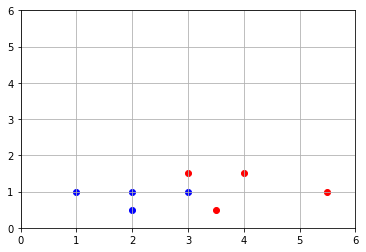

In [41]:
# scatter plot of data

plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2]==0:
        color = "b"
    plt.scatter(point[0],point[1],c=color)

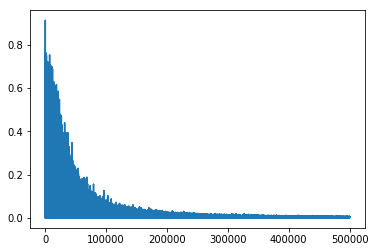

In [42]:
# training loop

learning_rate = 0.5 # select a random learning rate , involves hit and trial
costs = []
for i in range(1, 500000):
    random_index = np.random.randint(len(data)) # generate a random index
    point = data[random_index] # point is a random flower dimension from the original matrix
    # print(point)
    
    z= point[0]*w1 + point[1]*w2 + b # here we calculate value of z
    prediction = sigmoid(z) # prediction for z is calculated
    # print(h)
    
    target = point[2] 
    cost = np.square(prediction - target) # cost is calculated using the error
    costs.append(cost)
    
    # calculation of derivatives for backpropagation
    dcost_dpred = 2 * (prediction - target)
    dpred_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dw1 = dcost_dpred * dpred_dz * dz_dw1 # expression equals dcost/dw1
    dcost_dw2 = dcost_dpred * dpred_dz * dz_dw2 # expression equals dcost/dw2
    dcost_db = dcost_dpred * dpred_dz * dz_db # expression equals dcost/db
    
    # gradient descent is applied
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db

# the graph below indicates how cost is decreasing gradually
plt.plot(costs)

In [32]:
# making predictions

import os

def which_flower(length, width):
    z = length*w1 + width*w2 + b
    pred = sigmoid(z)
    if pred > 0.5:
        print(length,width,"  -->  red flower")
    else:
        print(length,width,"  -->  blue flower")

In [33]:
# classification of flowers in data

for i in data:
    which_flower(i[0],i[1])

3 1.5   -->  red flower
2 1   -->  blue flower
4 1.5   -->  red flower
3 1   -->  blue flower
3.5 0.5   -->  red flower
2 0.5   -->  blue flower
5.5 1   -->  red flower
1 1   -->  blue flower


In [34]:
which_flower(4.5,1) # correct answer

4.5 1   -->  red flower
